In [69]:
# read point set from text file
import pandas as pd 
import numpy as np

path='C:\\NX_OPEN\Practice\\01_create_pt_on_face\\'
file_a='pts_exported_a.txt'
file_b='pts_exported_b.txt'
df_a=pd.read_csv(path+file_a, names=['X','Y','Z'])
df_b=pd.read_csv(path+file_b, names=['X','Y','Z'])
print(df_a.head())

           X          Y         Z
0 -28.792799 -47.852574  4.750000
1 -28.723598 -47.852574  4.746801
2 -28.654987 -47.852574  4.737230
3 -28.587552 -47.852574  4.721369
4 -28.521868 -47.852574  4.699354


In [70]:
# merge point set a and b
frames=[df_a, df_b]
df_ab=pd.concat(frames)
display(df_ab.head())

,X,Y,Z
0,-28.792799,-47.852574,4.750000
1,-28.723598,-47.852574,4.746801
2,-28.654987,-47.852574,4.737230
3,-28.587552,-47.852574,4.721369
4,-28.521868,-47.852574,4.699354


In [71]:
# add noisy to point array

def add_noisy(lower_limit, upper_limit, input_df):
    # convert df to array
    df_array_ori=input_df.to_numpy()
    # print('df_array_ori', df_array_ori)
    
    # Generate noisy array with the same shape as df
    noisy_array = np.random.uniform(lower_limit, upper_limit, size=df_array_ori.shape)
    # print('noisy_array', noisy_array)
    
    # add noisy to point set
    df_array_noisy_added=df_array_ori+noisy_array
    # print('df_array_noisy_added', df_array_noisy_added)

    # convert array to df
    df = pd.DataFrame(df_array_noisy_added, columns = ['X','Y','Z'])
    #print(df.head())
    return df

lower_limit=-0.05
upper_limit=0.05
input_df=df_a
df_a_noisy_added=add_noisy(lower_limit,upper_limit, input_df)
print(df_a_noisy_added.head())

           X          Y         Z
0 -28.790901 -47.807193  4.703568
1 -28.757966 -47.902214  4.768340
2 -28.608916 -47.830058  4.710455
3 -28.636698 -47.816656  4.682626
4 -28.540447 -47.837147  4.740094


In [72]:
# check point set
import plotly.express as px 

fig = px.scatter_3d(df_ab, x='X', y='Y', z='Z',size_max=20,opacity=0.95)
fig.update_traces(marker={'size': 2})  
fig.show()


In [73]:
# within point set, the min and max distance of 2 points (not the adacent dist) 
import scipy.spatial.distance as distance

pt_array=df_a.to_numpy()
dist=distance.pdist(pt_array)

print('Two point distance_max: ',dist.max())
print('Two point distance_min: ',dist.min())

Two point distance_max:  2.8284271247461903
Two point distance_min:  0.06927518796855833


In [74]:
# min max distance of adjacent points
from scipy.spatial import cKDTree

# Build a KDTree for efficient nearest neighbors search
kdtree = cKDTree(pt_array)
# print("Number of points:", kdtree.n)
# print("Tree dimension:", kdtree.m)
# print("Tree data points:", kdtree.data)
# print("Tree leafsize:", kdtree.leafsize)

# Query the KDTree for the k-nearest neighbors of each point
k = 3  # Number of neighbors, including the point itself
distances, indices = kdtree.query(pt_array, k=k)

# Calculate minimum and maximum adjacent distances
min_distances = np.min(distances[:, 1:])  # Exclude the distance to the point itself
max_distances = np.max(distances[:, 1:])
# print(distances)
# print(len(distances))

print('Min adjacent distance: ',min_distances)
print('Max adjacent distance: ',max_distances)

Min adjacent distance:  0.06927518796855833
Max adjacent distance:  0.18473383458296655


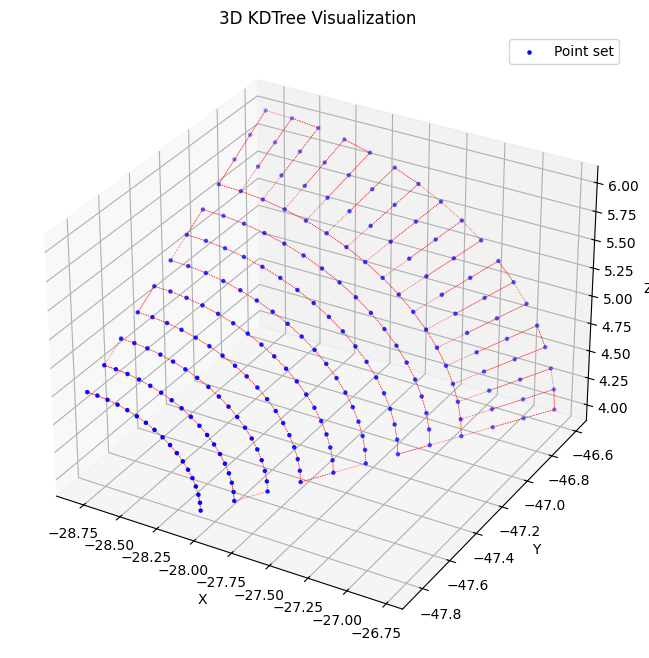

In [75]:
# plot kdtree, the ref to know adjacent dist calculated with Python
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Build a KDTree
kdtree = cKDTree(pt_array)
k=3

# Plot 3D points
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pt_array[:, 0], pt_array[:, 1], pt_array[:, 2], c='blue', marker='.', label='Point set')

# Plot KDTree edges
for i, point in enumerate(pt_array):
    distances, indices = kdtree.query(point, k=k)
    for neighbor_index in indices[1:]:
        neighbor_point = pt_array[neighbor_index]
        ax.plot([point[0], neighbor_point[0]], [point[1], neighbor_point[1]], [point[2], neighbor_point[2]], c='red', linestyle=':',linewidth=0.5)

ax.set_title('3D KDTree Visualization')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

In [76]:
import datetime
now = datetime.datetime.now()
print(now.year,'-',now.month,'-',now.day, '_',now.hour,'-', now.minute,'-',now.second)


2023 - 11 - 18 _ 11 - 30 - 37
